Notes are from Fandango, Armando. Mastering TensorFlow 1.x: Advanced machine learning and deep learning concepts using TensorFlow 1.x and Keras (Kindle Locations 2090-2095). Packt Publishing. Kindle Edition. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#MNIST-Dataset" data-toc-modified-id="MNIST-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MNIST Dataset</a></span><ul class="toc-item"><li><span><a href="#Get-the-MNIST-data" data-toc-modified-id="Get-the-MNIST-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Get the MNIST data</a></span></li><li><span><a href="#MLP-in-TensorFlow" data-toc-modified-id="MLP-in-TensorFlow-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>MLP in TensorFlow</a></span></li><li><span><a href="#MLP-in-Keras" data-toc-modified-id="MLP-in-Keras-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>MLP in Keras</a></span></li><li><span><a href="#MLP-in-TFLearn" data-toc-modified-id="MLP-in-TFLearn-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>MLP in TFLearn</a></span></li></ul></li><li><span><a href="#TimeSeries-Data---MLP---Keras" data-toc-modified-id="TimeSeries-Data---MLP---Keras-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>TimeSeries Data - MLP - Keras</a></span><ul class="toc-item"><li><span><a href="#Prepare-the-data" data-toc-modified-id="Prepare-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Prepare the data</a></span></li><li><span><a href="#Build,-Train-and-Evaluate-the-Model" data-toc-modified-id="Build,-Train-and-Evaluate-the-Model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Build, Train and Evaluate the Model</a></span></li></ul></li></ul></div>

# MultiLayer Perceptron <a class="tocSkip">

In [1]:
import numpy as np
np.random.seed(123)
print("NumPy:{}".format(np.__version__))

import pandas as pd
print("Pandas:{}".format(pd.__version__))

import math
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 10
print("Matplotlib:{}".format(mpl.__version__))

import tensorflow as tf
tf.set_random_seed(123)
print("TensorFlow:{}".format(tf.__version__))

import keras
print("Keras:{}".format(keras.__version__))

NumPy:1.14.5
Pandas:0.22.0
Matplotlib:2.2.2
TensorFlow:1.11.0


Using TensorFlow backend.


Keras:2.2.4


In [2]:
DATASETSLIB_HOME = '../datasetslib'
import sys
if not DATASETSLIB_HOME in sys.path:
    sys.path.append(DATASETSLIB_HOME)
%reload_ext autoreload
%autoreload 2
import datasetslib

from datasetslib import util as dsu

In [3]:
datasetslib.datasets_root = os.path.join(os.path.expanduser('~'),'datasets')

# MNIST Dataset

## Get the MNIST data

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(os.path.join(datasetslib.datasets_root, 'mnist'),
                                  one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/ubuntu/datasets/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/ubuntu/datasets/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /home/ubuntu/datasets/mnist/t10k-images-idx3-ubyte.gz
Extracting /home/ubuntu/datasets/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:

X_train = mnist.train.images
X_test = mnist.test.images
Y_train = mnist.train.labels
Y_test = mnist.test.labels
print(X_train.shape,Y_train.shape)

num_outputs = 10  # 0-9 digits
num_inputs = 784  # total pixels

(55000, 784) (55000, 10)


## MLP in TensorFlow

In [6]:
tf.reset_default_graph()

The mlp() function builds the network layers with the following logic: 

The mlp() function takes five inputs: 

x is the input features tensor    
num_inputs is the number of input features    
num_outputs is the number of output targets    
num_layers is the number of hidden layers required    
num_neurons is the list containing the number of neurons for each layer   

In [8]:
def mlp(x, num_inputs, num_outputs, num_layers, num_neurons):
    w = []
    b = []
    #Run a loop for the number of hidden layers to create weights and bias tensors and append them to their respective lists:
    #    The first dimension of the weight tensor is the number of inputs from the previous layer. 
    #    For the first hidden layer, the first dimension is num_inputs. 
    #    The second dimension of the weights tensor is the number of neurons in the current layer. 
    for i in range(num_layers):
        # weights
        #The tensors are given the names w_ < layer_num > and b_ < layer_num > respectively.
        #The tensors are initialized with normal distribution using tf.random_normal(). 
        w.append(tf.Variable(tf.random_normal(
            [num_inputs if i == 0 else num_neurons[i - 1],
             num_neurons[i]]),
            name="w_{0:04d}".format(i)
        ))
        # biases
        #    The biases are all one-dimensional tensors, where the dimension equals the number of neurons in the current layer.
        b.append(tf.Variable(tf.random_normal(
            [num_neurons[i]]),
            name="b_{0:04d}".format(i)
        ))
    # Create the weights and biases for the last hidden layer. 
    # The dimensions of the weights tensor are equal to the 
    # number of neurons in the last hidden layer and the number of output targets. 
    w.append(tf.Variable(tf.random_normal(
        [num_neurons[num_layers - 1] if num_layers > 0 else num_inputs,
         num_outputs]), name="w_out"))
    #The bias would be a tensor having a single dimension of the size of the number of output features:
    b.append(tf.Variable(tf.random_normal([num_outputs]), name="b_out"))

    # Now start defining the layers. First, treat x as the first most visible input layer:
    # x is input layer
    layer = x
    
    #Add the hidden layers in a loop. 
    # Each hidden layer represents the linear function 
    # tf.matmul( layer, w[ i]) + b[ i] being made nonlinear by the activation function tf.nn.relu():
    # add hidden layers
    for i in range(num_layers):
        layer = tf.nn.relu(tf.matmul(layer, w[i]) + b[i])
    
    # add output layer
    # The one difference between the output layer and the hidden layer is the 
    # absence of activation function in the output layer:
    layer = tf.matmul(layer, w[num_layers]) + b[num_layers]

    return layer


In [10]:
#The helper function mnist_batch_func() wraps the TensorFlow's batch function for the MNIST dataset 
#  to provide the next batch of images:
#TensorFlow provides this function for the MNIST dataset; 
#  however, for other datasets, we may have to write our own batch function.

def mnist_batch_func(batch_size=100):
    X_batch, Y_batch = mnist.train.next_batch(batch_size)
    return [X_batch, Y_batch]


The helper function, tensorflow_classification(), trains and evaluates the model. 

The tensorflow_classification() function takes several inputs: 

* n_epochs is the number of training loops to run 
* n_batches is the number of randomly sampled batches for which the training in each cycle should be run 
* batch_size is the number of samples in each batch 
* batch_func is the function that takes the batch_size and returns the sample batch of X and Y 
* model is the actual neural network or layers with neurons 
* optimizer is the optimization function defined using TensorFlow 
* loss is the loss of cost function that the optimizer would optimize the parameters for 
* accuracy_function is the function that calculates the accuracy score 
* X_test and Y_test are the datasets for the testing


In [11]:
def tensorflow_classification(n_epochs, n_batches,
                              batch_size, batch_func,
                              model, optimizer, loss, accuracy_function,
                              X_test, Y_test):
    with tf.Session() as tfs:
        tfs.run(tf.global_variables_initializer())
        #Run the training for n_epoch cycles:
        for epoch in range(n_epochs):
            #In each cycle, take the n_batches number of sample sets and train the model, 
            #calculate the loss for each batch, calculate the average loss for each epoch:
            epoch_loss = 0.0
            for batch in range(n_batches):
                X_batch, Y_batch = batch_func(batch_size)
                feed_dict = {x: X_batch, y: Y_batch}
                _, batch_loss = tfs.run([optimizer, loss], feed_dict)
                epoch_loss += batch_loss
            average_loss = epoch_loss / n_batches
            print("epoch: {0:04d}   loss = {1:0.6f}".format(
                epoch, average_loss))
        #When all the epoch cycles are finished, calculate and print the accuracy score calculated with the accuracy_function:
        feed_dict = {x: X_test, y: Y_test}
        accuracy_score = tfs.run(accuracy_function, feed_dict=feed_dict)
        print("accuracy={0:.8f}".format(accuracy_score))

In [12]:
tf.reset_default_graph()

The parameters are described below: 

* num_layers is the number of hidden layers. We first practice with no hidden layer, only the input, and output layers. 

* num_neurons is the empty list because there are no hidden layers. 
* learning_rate is 0.01, a randomly selected small number. 

* num_epochs represents the 50 iterations to learn the parameters for the only neuron that connects the inputs to the output. 

* batch_size is kept at 100, again a matter of choice. Larger batch size does not necessarily offer higher benefits. You might have to explore different batch sizes to find the optimum batch size for your neural networks. 

* n_batches: Number of batches is calculated approximately to be the number of examples divided by the number of samples in a batch.


In [15]:
num_layers = 0
num_neurons = []
learning_rate = 0.01
n_epochs = 50
batch_size = 100
n_batches = int(mnist.train.num_examples / batch_size)

In [14]:
# input images
x = tf.placeholder(dtype=tf.float32, name="x", shape=[None, num_inputs])
# target output
y = tf.placeholder(dtype=tf.float32, name="y", shape=[None, num_outputs])


In [16]:
model = mlp(x=x,
            num_inputs=num_inputs,
            num_outputs=num_outputs,
            num_layers=num_layers,
            num_neurons=num_neurons)


When the softmax_cross_entropy_with_logits() function is used, make sure that the output is unscaled and has not been passed through the softmax activation function. This function internally uses softmax to scale the output.


In [17]:
# loss function
loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=y))


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



This function computes the softmax entropy between the model (the estimated value y) and the actual value of y. 

The entropy function is used when the output belongs to one class and not more than one class. 

As in our example, the image can only belong to one of the digits. 

More information on this entropy function can be found at https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits.


In [18]:
# optimizer function
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(loss)

In [19]:
predictions_check = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
accuracy_function = tf.reduce_mean(tf.cast(predictions_check, tf.float32))

### The below code might run for a few minutes

In [20]:
tensorflow_classification(n_epochs=n_epochs,
                          n_batches=n_batches,
                          batch_size=batch_size,
                          batch_func=mnist_batch_func,
                          model=model,
                          optimizer=optimizer,
                          loss=loss,
                          accuracy_function=accuracy_function,
                          X_test=mnist.test.images,
                          Y_test=mnist.test.labels
                          )

epoch: 0000   loss = 8.473080
epoch: 0001   loss = 4.390884
epoch: 0002   loss = 3.030011
epoch: 0003   loss = 2.392622
epoch: 0004   loss = 2.023636
epoch: 0005   loss = 1.782972
epoch: 0006   loss = 1.613726
epoch: 0007   loss = 1.487805
epoch: 0008   loss = 1.390011
epoch: 0009   loss = 1.311847
epoch: 0010   loss = 1.247507
epoch: 0011   loss = 1.193481
epoch: 0012   loss = 1.147407
epoch: 0013   loss = 1.107349
epoch: 0014   loss = 1.072285
epoch: 0015   loss = 1.041205
epoch: 0016   loss = 1.013279
epoch: 0017   loss = 0.988314
epoch: 0018   loss = 0.965635
epoch: 0019   loss = 0.944805
epoch: 0020   loss = 0.925856
epoch: 0021   loss = 0.908260
epoch: 0022   loss = 0.891954
epoch: 0023   loss = 0.876993
epoch: 0024   loss = 0.862779
epoch: 0025   loss = 0.849480
epoch: 0026   loss = 0.837104
epoch: 0027   loss = 0.825333
epoch: 0028   loss = 0.814350
epoch: 0029   loss = 0.803741
epoch: 0030   loss = 0.793860
epoch: 0031   loss = 0.784387
epoch: 0032   loss = 0.775280
epoch: 003

We see that the single neuron network slowly reduces the loss from 8.47 to 0.66 over 50 iterations, finally getting an accuracy of almost 85 percent. This is pretty bad accuracy for this specific example because this was only a demonstration of using TensorFlow for classification using MLP.


In [10]:
tf.reset_default_graph()

In [11]:
num_layers = 1 
num_neurons = []
for i in range(num_layers):
    num_neurons.append(8)
    
learning_rate = 0.01
n_epochs = 50
batch_size = 100
n_batches = int(mnist.train.num_examples/batch_size)

# input images
x = tf.placeholder(dtype=tf.float32, name="x", shape=[None, num_inputs]) 
# target output
y = tf.placeholder(dtype=tf.float32, name="y", shape=[None, num_outputs]) 

model = mlp(x=x, 
            num_inputs=num_inputs, 
            num_outputs=num_outputs, 
            num_layers=num_layers, 
            num_neurons=num_neurons)

# loss function
#loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(model), axis=1))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=y))
# optimizer function
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
predictions_check = tf.equal(tf.argmax(model,1), tf.argmax(y,1))
accuracy_function = tf.reduce_mean(tf.cast(predictions_check, tf.float32))

tensorflow_classification(n_epochs=n_epochs, 
                          n_batches=n_batches, 
                          batch_size=batch_size, 
                          batch_func=mnist_batch_func, 
                          model = model, 
                          optimizer = optimizer, 
                          loss = loss, 
                          accuracy_function = accuracy_function, 
                          X_test = mnist.test.images, 
                          Y_test = mnist.test.labels
                         )

epoch: 0000   loss = 4.013396
epoch: 0001   loss = 2.302745
epoch: 0002   loss = 2.156557
epoch: 0003   loss = 2.079378
epoch: 0004   loss = 2.026683
epoch: 0005   loss = 1.987903
epoch: 0006   loss = 1.958130
epoch: 0007   loss = 1.932892
epoch: 0008   loss = 1.909715
epoch: 0009   loss = 1.887257
epoch: 0010   loss = 1.865864
epoch: 0011   loss = 1.844288
epoch: 0012   loss = 1.823081
epoch: 0013   loss = 1.801307
epoch: 0014   loss = 1.778486
epoch: 0015   loss = 1.754043
epoch: 0016   loss = 1.726848
epoch: 0017   loss = 1.695823
epoch: 0018   loss = 1.662781
epoch: 0019   loss = 1.630441
epoch: 0020   loss = 1.598397
epoch: 0021   loss = 1.568061
epoch: 0022   loss = 1.537702
epoch: 0023   loss = 1.508838
epoch: 0024   loss = 1.480578
epoch: 0025   loss = 1.452838
epoch: 0026   loss = 1.426458
epoch: 0027   loss = 1.400067
epoch: 0028   loss = 1.375169
epoch: 0029   loss = 1.351013
epoch: 0030   loss = 1.326956
epoch: 0031   loss = 1.303237
epoch: 0032   loss = 1.281651
epoch: 003

Let us run the same code again by adding 256 more hidden neurons

In [22]:
tf.reset_default_graph()

In [23]:
num_layers = 2
num_neurons = []
for i in range(num_layers):
    num_neurons.append(256)
    
learning_rate = 0.01
n_epochs = 50
batch_size = 100
n_batches = int(mnist.train.num_examples/batch_size)

# input images
x = tf.placeholder(dtype=tf.float32, name="x", shape=[None, num_inputs]) 
# target output
y = tf.placeholder(dtype=tf.float32, name="y", shape=[None, num_outputs]) 


In [24]:
model = mlp(x=x, 
            num_inputs=num_inputs, 
            num_outputs=num_outputs, 
            num_layers=num_layers, 
            num_neurons=num_neurons)

# loss function
#loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(model), axis=1))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, 
                                                              labels=y))
# optimizer function
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

predictions_check = tf.equal(tf.argmax(model,1), tf.argmax(y,1))
accuracy_function = tf.reduce_mean(tf.cast(predictions_check, tf.float32))



### The below code might take a few minutes to run

In [25]:

tensorflow_classification(n_epochs=n_epochs, 
                          n_batches=n_batches, 
                          batch_size=batch_size, 
                          batch_func=mnist_batch_func, 
                          model = model, 
                          optimizer = optimizer, 
                          loss = loss, 
                          accuracy_function = accuracy_function, 
                          X_test = mnist.test.images, 
                          Y_test = mnist.test.labels
                         )

epoch: 0000   loss = 58.754058
epoch: 0001   loss = 14.521847
epoch: 0002   loss = 8.922171
epoch: 0003   loss = 6.241642
epoch: 0004   loss = 4.599127
epoch: 0005   loss = 3.614644
epoch: 0006   loss = 2.846957
epoch: 0007   loss = 2.325747
epoch: 0008   loss = 1.888454
epoch: 0009   loss = 1.571295
epoch: 0010   loss = 1.307724
epoch: 0011   loss = 1.085919
epoch: 0012   loss = 0.910493
epoch: 0013   loss = 0.756905
epoch: 0014   loss = 0.661583
epoch: 0015   loss = 0.557197
epoch: 0016   loss = 0.463660
epoch: 0017   loss = 0.398142
epoch: 0018   loss = 0.337610
epoch: 0019   loss = 0.281566
epoch: 0020   loss = 0.236837
epoch: 0021   loss = 0.207340
epoch: 0022   loss = 0.166393
epoch: 0023   loss = 0.147394
epoch: 0024   loss = 0.126139
epoch: 0025   loss = 0.107418
epoch: 0026   loss = 0.088536
epoch: 0027   loss = 0.066566
epoch: 0028   loss = 0.055672
epoch: 0029   loss = 0.056304
epoch: 0030   loss = 0.042222
epoch: 0031   loss = 0.032222
epoch: 0032   loss = 0.028842
epoch: 0

Thus, by adding two rows and 256 neurons to each layer, we brought the accuracy up to 0.936. You are encouraged to try the code with different values of variables to observe how it affects the loss and accuracy.



## MLP in Keras


Now let's build the same MLP network with Keras, a high-level library for TensorFlow. We keep all the parameters the same as we used for the TensorFlow example in this chapter, for example, the activation function for the hidden layers is kept as the ReLU function.


In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [27]:
tf.reset_default_graph()
keras.backend.clear_session()

In [29]:
# Set up parameters
num_layers = 2
num_neurons = []
for i in range(num_layers):
    num_neurons.append(256)
    
learning_rate = 0.01
n_epochs = 50
batch_size = 100



In [31]:
# Create a sequential model
model = Sequential()

# Add the first hidden layer. Only in the first hidden layer, we have to specify the shape of the input tensor:
model.add(Dense(units=num_neurons[0], activation='relu', 
                input_shape=(num_inputs,)))

# Add the second layer
model.add(Dense(units=num_neurons[1], activation='relu'))

# Add the output layer with the activation function softmax:
model.add(Dense(units=num_outputs, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [32]:
#Compile the model with an SGD optimizer:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=learning_rate),
              metrics=['accuracy'])


In [33]:
# Train the model:
model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=n_epochs)

score = model.evaluate(X_test, Y_test)
print('\nTest loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
55000/55000 [==============================] - 2s 36us/step - loss: 1.1228 - acc: 0.7337
Epoch 2/50
55000/55000 [==============================] - 2s 29us/step - loss: 0.4494 - acc: 0.8800
Epoch 3/50
55000/55000 [==============================] - 2s 29us/step - loss: 0.3570 - acc: 0.9002
Epoch 4/50
55000/55000 [==============================] - 2s 29us/step - loss: 0.3158 - acc: 0.9106
Epoch 5/50
55000/55000 [==============================] - 2s 29us/step - loss: 0.2892 - acc: 0.9182
Epoch 6/50
55000/55000 [==============================] - 2s 29us/step - loss: 0.2693 - acc: 0.9230
Epoch 7/50
55000/55000 [==============================] - 2s 29us/step - loss: 0.2533 - acc: 0.9276
Epoch 8/50
55000/55000 [==============================] - 2s 29us/step - loss: 0.2392 - acc: 0.9324
Epoch 9/50
55000/55000 [==============================] - 2s 29us/step - loss: 0.2270 - acc: 0.9357
Epoch 10/50
55000/55000 [==============================] - 2s 29us/step - loss: 0.2164 - acc: 0.9383

## MLP in TFLearn

Now let's see how to implement the same MLP using TFLearn

In [34]:
import tflearn

In [18]:
tf.reset_default_graph()

In [35]:
# Set up parameters
num_layers = 2
num_neurons = []
for i in range(num_layers):
    num_neurons.append(256)
    
learning_rate = 0.01
n_epochs = 50
batch_size = 100


In [36]:
# Build deep neural network
# input layer, two hidden layers, and the output layer 
# (the same architecture as examples in TensorFlow and Keras sections):

input_layer = tflearn.input_data(shape=[None, num_inputs])
dense1 = tflearn.fully_connected(input_layer, num_neurons[0], activation='relu')
dense2 = tflearn.fully_connected(dense1, num_neurons[1], activation='relu')
softmax = tflearn.fully_connected(dense2, num_outputs, activation='softmax')


In [37]:
optimizer = tflearn.SGD(learning_rate=learning_rate)

In [38]:
net = tflearn.regression(softmax, optimizer=optimizer, 
                         metric=tflearn.metrics.Accuracy(), 
                         loss='categorical_crossentropy')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [39]:
# The MLP model is known as DNN in TFLearn
model = tflearn.DNN(net)

In [40]:
# Training
model.fit(X_train, Y_train, 
          n_epoch=n_epochs, batch_size=batch_size, 
          show_metric=True, run_id='dense_model')


Training Step: 27499  | total loss: 0.12371 | time: 2.771s
| SGD | epoch: 050 | loss: 0.12371 - acc: 0.9628 -- iter: 54900/55000
Training Step: 27500  | total loss: 0.11805 | time: 2.777s
| SGD | epoch: 050 | loss: 0.11805 - acc: 0.9655 -- iter: 55000/55000
--


In [41]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[0])

Test accuracy: 0.9647


# TimeSeries Data - MLP - Keras

## Prepare the data

In [22]:
datasetslib.datasets_root

'/home/ubuntu/datasets'

In [42]:
import os

#dataframe = pd.read_csv(os.path.join(datasetslib.datasets_root, 
#                                     'ts-data', 
#                                     '../data/international-airline-passengers.csv'), 
#                        usecols=[1],header=0)

# Let us use panda to read the data into a dataframe
dataframe = pd.read_csv('../data/international-airline-passengers.csv', 
                        usecols=[1],header=0)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [43]:
# split into train and test sets
# For time series datasets, we have a separate function that does not shuffle the observations because 
# for time series regression we need to maintain the order of the observations. 
# We use 67 percent data for training and 33 percent for testing.

train,test=dsu.train_test_split(dataset,train_size=0.67)
print(len(train), len(test))

97 48


For time series regression, we convert the dataset to build a supervised data set. 

We use a lag of two time steps in this example. 

We set n_x to 2 and the mvts_to_xy() function returns the input and output (X and Y) train and test sets such that X has values for time {t-1, t} in two columns and Y has values for time {t + 1} in one column. 

Our learning algorithm assumes that values at time t + 1 can be learned by finding the relationship between values for time {t-1, t, t + 1}.


In [44]:
# reshape into X=t-1,t and Y=t+1
# TimeSeries to XY
n_x=2
n_y=1

X_train, Y_train, X_test, Y_test = dsu.mvts_to_xy(train,test,n_x=n_x,n_y=n_y)

More information on converting time series datasets as supervised learning problems can be found at the following link: 
http://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/.


## Build, Train and Evaluate the Model

In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [46]:
tf.reset_default_graph()
keras.backend.clear_session()

In [47]:
print(X_train.shape, Y_train.shape)

(95, 2) (95, 1)


In [48]:
num_layers = 2
num_neurons = [8,8]
n_epochs = 50
batch_size = 2


In [49]:
model = Sequential()
model.add(Dense(num_neurons[0], activation='relu', input_shape=(n_x,)))
model.add(Dense(num_neurons[1], activation='relu'))
model.add(Dense(units=1))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Compile with MSE loss and Adam optimizer
model.compile(loss='mse', optimizer='adam')


In [52]:
# Training
model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=n_epochs)



Epoch 1/50
95/95 [==============================] - 0s 4ms/step - loss: 89630.0523
Epoch 2/50
95/95 [==============================] - 0s 1ms/step - loss: 65499.0244
Epoch 3/50
95/95 [==============================] - 0s 1ms/step - loss: 52652.4532
Epoch 4/50
95/95 [==============================] - 0s 1ms/step - loss: 49833.5211
Epoch 5/50
95/95 [==============================] - 0s 1ms/step - loss: 46130.1543
Epoch 6/50
95/95 [==============================] - 0s 1ms/step - loss: 38998.8676
Epoch 7/50
95/95 [==============================] - 0s 1ms/step - loss: 28291.7857
Epoch 8/50
95/95 [==============================] - 0s 1ms/step - loss: 16052.6664
Epoch 9/50
95/95 [==============================] - 0s 1ms/step - loss: 6496.2310
Epoch 10/50
95/95 [==============================] - 0s 1ms/step - loss: 2046.9626
Epoch 11/50
95/95 [==============================] - 0s 1ms/step - loss: 967.6489
Epoch 12/50
95/95 [==============================] - 0s 1ms/step - loss: 825.5313
Epoch 1

In [53]:
print(X_test.shape, Y_test.shape)

(46, 2) (46, 1)


In [54]:
# make predictions on the training set and test set
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)


In [55]:
# shift train predictions for plotting
Y_train_pred_plot = np.empty_like(dataset)
Y_train_pred_plot[:, :] = np.nan
Y_train_pred_plot[n_x-1:len(Y_train_pred)+n_x-1, :] = Y_train_pred


In [56]:
# shift test predictions for plotting
Y_test_pred_plot = np.empty_like(dataset)
Y_test_pred_plot[:, :] = np.nan
Y_test_pred_plot[len(Y_train_pred)+(n_x*2)-1:len(dataset)-1, :] = Y_test_pred


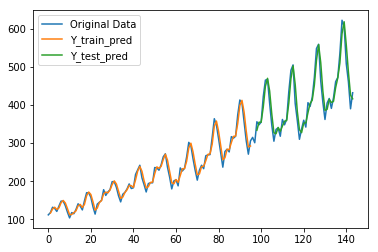

In [57]:
# plot baseline and predictions
plt.plot(dataset,label='Original Data')
plt.plot(Y_train_pred_plot,label='Y_train_pred')
plt.plot(Y_test_pred_plot,label='Y_test_pred')
plt.legend()
plt.show()